In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing
import matplotlib.pyplot as plt # Matplotlib for Plotting
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://www.dropbox.com/s/uysjhtgf8mdj1tv/Caltech_Bank-Customers.csv?dl=0


--2024-02-08 00:43:24--  https://www.dropbox.com/s/uysjhtgf8mdj1tv/Caltech_Bank-Customers.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/uysjhtgf8mdj1tv/Caltech_Bank-Customers.csv [following]
--2024-02-08 00:43:24--  https://www.dropbox.com/s/raw/uysjhtgf8mdj1tv/Caltech_Bank-Customers.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaf605b9e102274add7c61c57a1.dl.dropboxusercontent.com/cd/0/inline/CM12U2Cv_w1qviuDhvw23LhZcbbNz7JFuqaBAwPv6FuyzonLbBHqWmkbbxuRVh2LCQnrLTw4E0Nx8qPFkc_xQkhF11P28iGcLB5Mz-ayT4AFnXhYPnjGrjoqyUzpxbLHzF5469zTsSI9H4gxKUeIRo2m/file# [following]
--2024-02-08 00:43:25--  https://ucaf605b9e102274add7c61c57a1.dl.dropboxusercontent.com/cd/0/inline/CM12U2Cv_w1qviuDhvw23LhZcbbNz7JFuqaBAwPv6FuyzonLbBHqWmk

In [3]:
loan=pd.read_csv('/content/Caltech_Bank-Customers.csv?dl=0')
loan.head()

,Cust_id,Age,Earning,Credit Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [4]:
Y=loan.iloc[:,[2,3]].values

Text(0, 0.5, 'Distance between samples')

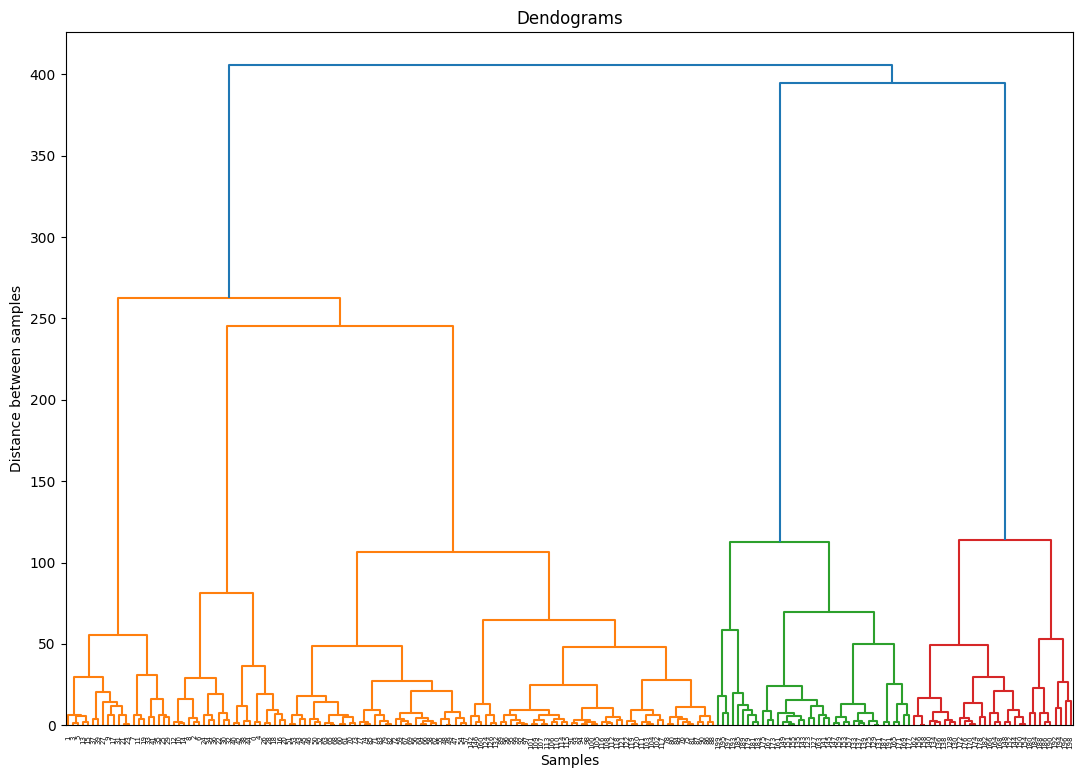

In [6]:
plt.figure(figsize=(13,9))
plt.title('Dendograms')
dendogram=shc.dendrogram(shc.linkage(Y, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Distance between samples')

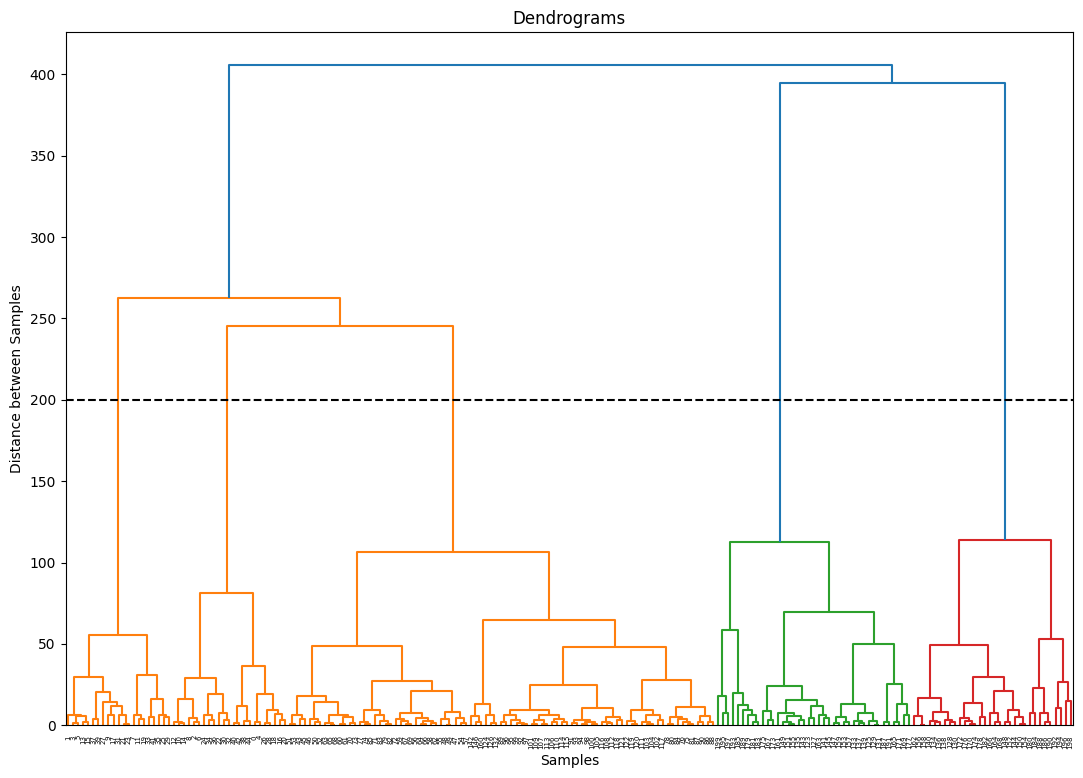

In [7]:
plt.figure(figsize=(13, 9))
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(Y, method='ward'))#ward is used to calculate distance between newly formed clu  sters and can only be used with Euclidean Distance
plt.axhline(y=200, color='k', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Distance between Samples')
plt.show()

In [9]:
h_clustering=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
h_clustering1=h_clustering.fit_predict(Y)

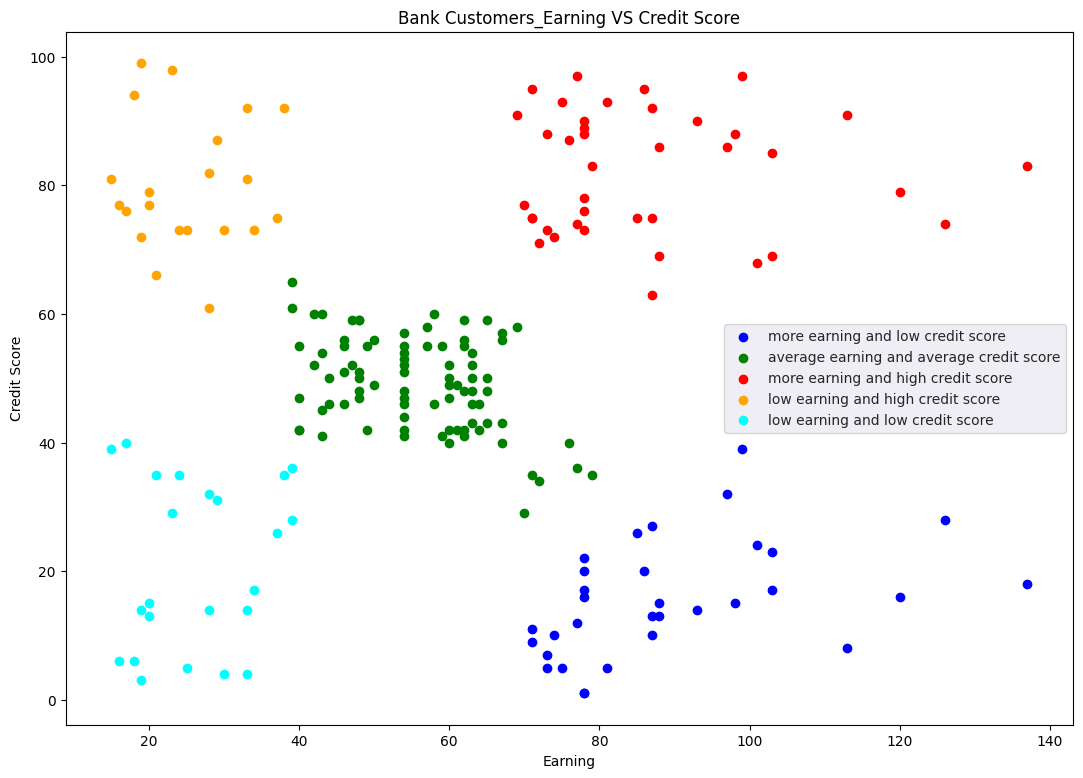

In [22]:
plt.scatter(Y[h_clustering1==0,0],Y[h_clustering1==0,1],color='blue',label='more earning and low credit score')
plt.scatter(Y[h_clustering1==1,0],Y[h_clustering1==1,1],color='green',label='average earning and average credit score')
plt.scatter(Y[h_clustering1==2,0],Y[h_clustering1==2,1],color='red',label='more earning and high credit score')
plt.scatter(Y[h_clustering1==3,0],Y[h_clustering1==3,1],color='orange',label='low earning and high credit score')
plt.scatter(Y[h_clustering1==4,0],Y[h_clustering1==4,1],color='cyan',label='low earning and low credit score')
plt.title('Bank Customers_Earning VS Credit Score')
fig=plt.gcf()
fig.set_size_inches(13,9)
sns.set_style('darkgrid')
plt.xlabel('Earning')
plt.ylabel('Credit Score')
plt.legend()
plt.show()